# 1월 카드매출 샘플 데이터
1) 행정동간 비교
- 행정동간 (vertical) 전체 카드매출 min-max scaling
- 1등급(0.75~1), 2등급 (0.5~0.75), 3등급 (0.25~0.5), 4등급(0~0.25) 값으로 변환 

2) 행정동 내 연령대별 비교
- min-max scaling으로 연령대간 (horizontal) 카드매출 0~1 스케일링
- 1등급(0.75~1), 2등급 (0.5~0.75), 3등급 (0.25~0.5), 4등급(0~0.25) 값으로 변환 

3) 기타 인구특성(국적, 관내외))

1. 행정동 간
    - total 카드매출 순위
    - 예상결과: 1위 화양동, 2위 oo동, ...

    - 평일(WD) & 주말 (HD) 카드매출 순위
    - 예상결과: 평일 카드매출 - 1위 자양동, 2위 화양동 ...
              주말 카드매출 - 1위 화양동, 2위 구의동 ...

2. 행정동 내
    - GID 별 total 카드매출 순위
    - 예상결과: (화양동)1위 다사435, 2위 다사xxx => 지도상 시각화
  
    - 연령대별 카드매출 순위
    - 예상결과: (화양동) 1위 20대, 2위 30대 ...

시간
- 평일 카드매출
- 주말 카드매출

인구집단 특성
- 연령대
- 소재지


In [30]:
import chardet
import pandas as pd
with open('dataset/CD_SALES_SAMPLE_JAN_new.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

df = pd.read_csv('dataset/CD_SALES_SAMPLE_JAN_new.csv', encoding=encoding)
df.head()

,DATE,GID,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,TOTAL,WD_A10,WD_A20,WD_A30,WD_A40,WD_A50,WD_A60,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_TOTAL
0,202301,다사633494,내국인,관내,2.5053,128.3526,1.7894,19.0435,81.2373,118.1706,351.0987,74.3231,23.1450,91.4775,127.4155,86.8703,105.2241,508.4556,42.0324,25.5026,90.0393,54.3197,111.1483,70.8795,393.9217
1,202301,다사633494,내국인,관외,78.5510,107.0086,60.0461,73.9002,107.1762,5.9529,432.6350,88.5940,66.4779,32.5909,83.7079,20.0629,131.6604,423.0940,59.9560,67.3457,122.0916,11.3952,107.0546,139.2939,507.1369
2,202301,다사633494,외국인,X,137.6543,76.3147,110.1936,107.6873,122.0817,121.7283,675.6599,39.2127,20.1924,14.7927,44.0129,113.7098,128.0191,359.9396,113.7902,104.9694,145.3778,83.2026,139.0686,102.5485,688.9572
3,202301,다사633494,법인,X,117.1023,20.9697,32.2151,45.0039,92.3848,128.8860,436.5619,12.4171,39.5152,123.8865,19.1106,34.0323,41.4079,270.3697,44.1532,3.6607,6.0525,130.7093,116.4985,98.6191,399.6933
4,202301,다사626517,내국인,관내,130.1293,102.1696,114.5566,102.7374,48.8366,87.2372,585.6667,26.3511,116.1462,140.8742,111.7216,89.7929,31.8818,516.7678,59.0021,50.1735,121.7888,66.9163,125.5592,15.0025,438.4425


In [58]:
df['DATE'].unique()  # [202301]
len(gid_list.tolist())

1812

In [55]:
gid_list = df['GID'].unique() # length: 1812
df[df['GID']==gid_list[0]]

,DATE,GID,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,TOTAL,WD_A10,WD_A20,WD_A30,WD_A40,WD_A50,WD_A60,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_TOTAL
0,202301,다사633494,내국인,관내,2.5053,128.3526,1.7894,19.0435,81.2373,118.1706,351.0987,74.3231,23.1450,91.4775,127.4155,86.8703,105.2241,508.4556,42.0324,25.5026,90.0393,54.3197,111.1483,70.8795,393.9217
1,202301,다사633494,내국인,관외,78.5510,107.0086,60.0461,73.9002,107.1762,5.9529,432.6350,88.5940,66.4779,32.5909,83.7079,20.0629,131.6604,423.0940,59.9560,67.3457,122.0916,11.3952,107.0546,139.2939,507.1369
2,202301,다사633494,외국인,X,137.6543,76.3147,110.1936,107.6873,122.0817,121.7283,675.6599,39.2127,20.1924,14.7927,44.0129,113.7098,128.0191,359.9396,113.7902,104.9694,145.3778,83.2026,139.0686,102.5485,688.9572
3,202301,다사633494,법인,X,117.1023,20.9697,32.2151,45.0039,92.3848,128.8860,436.5619,12.4171,39.5152,123.8865,19.1106,34.0323,41.4079,270.3697,44.1532,3.6607,6.0525,130.7093,116.4985,98.6191,399.6933
7248,202301,다사633494,내국인,관내,135.7780,33.7705,4.5604,30.9688,57.7598,82.0984,344.9360,32.2835,23.4128,71.5819,69.7370,146.3085,30.1962,373.5200,113.4898,84.2668,29.0590,16.1992,80.0343,116.7284,439.7774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210195,202301,다사633494,법인,X,148.9265,145.0652,57.6732,74.1722,145.4045,94.9910,666.2327,4.1675,57.6865,34.8590,5.7869,94.1168,57.1410,253.7578,48.5825,123.6659,87.4248,140.4755,0.6013,141.8282,542.5782
217440,202301,다사633494,내국인,관내,115.8705,34.7120,85.5480,148.7276,95.4495,22.9875,503.2951,59.1382,11.4065,133.2598,111.9726,4.1057,75.7714,395.6542,57.6763,123.7295,71.9470,108.9364,97.3344,146.4313,606.0550
217441,202301,다사633494,내국인,관외,60.9916,143.5210,86.8673,119.3693,22.2338,63.6999,496.6828,126.2968,29.6262,96.8320,78.3171,114.8857,114.2734,560.2312,29.5182,85.7420,29.0150,142.5051,16.6872,10.7756,314.2431
217442,202301,다사633494,외국인,X,44.0779,67.4021,107.6685,142.7147,22.1870,75.0214,459.0717,144.1111,70.9437,99.1132,125.1408,119.1164,93.1112,651.5363,143.4912,20.0496,102.3207,63.5666,90.6666,70.8785,490.9733


# IDEATION
- 제공 데이터: 카드매출, 유동인구

1. 각 인구집단별 수요에 맞춰 행정동별 인프라 만족 지수를 측정하고, 맞춤 상권 및 시설 제안
   - 문제상황: 생활반경 내 인프라에 대한 불만족 (증명해야함)
   - 수집 데이터: 행정동별 인구집단의 생활 만족도
   - 행정적 배경: 광진구 상권 재정비

2. 시간대별 주 유동인구 집단 특성을 반영하여 상업시설의 공실 시간대 컨텐츠 제안 (상업시설이 몰려있는 특정 행정구역으로 특정 가능)
   - 문제상황: 활용되지 못하고 공실로 낭비되는 시설 많음 (증명해야함)
   - 수집 데이터: 상업시설 별 공실 시간, 인구집단별 needs

3. 폐업위기 업체 예측 및 맞춤 지원프로그램 추천 서비스 제안

4. 복지 사각지대 취약 계층 발굴을 위한 OO 지표 개발 

# 카드매출 샘플 데이터_12개월 full_등급

In [64]:
import chardet
import pandas as pd
with open('dataset/CD_SALES_SAMPLE_JAN_new.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

df = pd.read_csv('dataset/CD_SALES_SAMPLE.csv', encoding=encoding)
df.head()

,Unnamed: 0,DATE,GID,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,TOTAL,WD_A10,WD_A20,WD_A30,WD_A40,WD_A50,WD_A60,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_TOTAL
0,0,202301,다사633494,내국인,관내,75.6125,15.6752,105.3431,18.2912,101.7623,90.2775,406.9618,145.1701,122.2308,81.8587,83.6861,136.9450,68.5151,638.4058,119.0858,20.4325,77.9265,47.4623,128.1334,32.8228,425.8633
1,1,202301,다사633494,내국인,관외,146.0104,19.6445,32.4111,115.7526,133.1323,105.1160,552.0669,116.1390,96.5837,104.8030,36.3705,44.7678,45.9913,444.6553,72.1303,8.6235,130.7499,76.1154,11.6603,140.4262,439.7057
2,2,202301,다사633494,외국인,X,145.6011,118.5649,11.8614,67.0122,132.6630,37.0361,512.7387,79.9315,68.1232,146.7481,83.7274,71.2445,45.7398,495.5145,54.5365,91.8547,34.9244,51.7703,139.8649,17.9982,390.9489
3,3,202301,다사633494,법인,X,147.4068,94.8521,41.6878,114.9653,6.9711,40.7735,446.6566,81.3797,73.7001,74.0427,71.8196,44.1874,49.7905,394.9199,9.2179,35.3266,108.9586,72.5817,65.7368,43.4129,335.2346
4,4,202301,다사626517,내국인,관내,21.0800,43.5208,49.7160,57.9968,31.7960,79.0143,283.1240,104.7284,135.8534,11.9809,53.0327,139.4728,125.5650,570.6331,23.9982,99.8758,86.5824,61.7702,39.9600,90.8793,403.0658


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86976 entries, 0 to 86975
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      86976 non-null  int64  
 1   DATE            86976 non-null  int64  
 2   GID             86976 non-null  object 
 3   CUSTOMER_CLASS  86976 non-null  object 
 4   CUSTOMER_ADDR   86976 non-null  object 
 5   A10             86976 non-null  float64
 6   A20             86976 non-null  float64
 7   A30             86976 non-null  float64
 8   A40             86976 non-null  float64
 9   A50             86976 non-null  float64
 10  A60             86976 non-null  float64
 11  TOTAL           86976 non-null  float64
 12  WD_A10          86976 non-null  float64
 13  WD_A20          86976 non-null  float64
 14  WD_A30          86976 non-null  float64
 15  WD_A40          86976 non-null  float64
 16  WD_A50          86976 non-null  float64
 17  WD_A60          86976 non-null 

In [66]:
df['GID'].unique()

array(['다사633494', '다사626517', '다사640506', ..., '다사624501', '다사613479',
       '다사630474'], dtype=object)

In [67]:
df['DATE'].unique()

array([202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308,
       202309, 202310, 202311, 202312])

In [76]:
# df 이름 설정 - 동적 이름 생성이 안됨 :(
months = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec']
df_names = []
for month in months:
    df_names.append(f'df_{month}')
i = 202301
for df_name in df_name:
    df_name = df[df['DATE']==i]
    i+=1

In [81]:
# 월별 df
df_jan = df[df['DATE']==202301]
df_feb = df[df['DATE']==202302]
df_mar = df[df['DATE']==202303]
df_apr = df[df['DATE']==202304]
df_may = df[df['DATE']==202305]
df_jun = df[df['DATE']==202306]
df_jul = df[df['DATE']==202307]
df_aug = df[df['DATE']==202308]
df_sep = df[df['DATE']==202309]
df_oct = df[df['DATE']==202310]
df_nov = df[df['DATE']==202311]
df_dec = df[df['DATE']==202312]

## 단위 test_1월

In [87]:
# 첫 번째 컬럼 삭제
df_jan.drop(columns=df_jan.columns[0], inplace=True)
df_jan.head()

/var/folders/ym/c6nn5rhx7sz6q6mw_m3tykqw0000gn/T/ipykernel_1493/2915946495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan.drop(columns=df_jan.columns[0], inplace=True)


,DATE,GID,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,TOTAL,WD_A10,WD_A20,WD_A30,WD_A40,WD_A50,WD_A60,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_TOTAL
0,202301,다사633494,내국인,관내,75.6125,15.6752,105.3431,18.2912,101.7623,90.2775,406.9618,145.1701,122.2308,81.8587,83.6861,136.9450,68.5151,638.4058,119.0858,20.4325,77.9265,47.4623,128.1334,32.8228,425.8633
1,202301,다사633494,내국인,관외,146.0104,19.6445,32.4111,115.7526,133.1323,105.1160,552.0669,116.1390,96.5837,104.8030,36.3705,44.7678,45.9913,444.6553,72.1303,8.6235,130.7499,76.1154,11.6603,140.4262,439.7057
2,202301,다사633494,외국인,X,145.6011,118.5649,11.8614,67.0122,132.6630,37.0361,512.7387,79.9315,68.1232,146.7481,83.7274,71.2445,45.7398,495.5145,54.5365,91.8547,34.9244,51.7703,139.8649,17.9982,390.9489
3,202301,다사633494,법인,X,147.4068,94.8521,41.6878,114.9653,6.9711,40.7735,446.6566,81.3797,73.7001,74.0427,71.8196,44.1874,49.7905,394.9199,9.2179,35.3266,108.9586,72.5817,65.7368,43.4129,335.2346
4,202301,다사626517,내국인,관내,21.0800,43.5208,49.7160,57.9968,31.7960,79.0143,283.1240,104.7284,135.8534,11.9809,53.0327,139.4728,125.5650,570.6331,23.9982,99.8758,86.5824,61.7702,39.9600,90.8793,403.0658


In [88]:
gid_list = df_jan['GID'].unique()

In [90]:
df_temp = df_jan[df_jan['GID']==gid_list[0]]
df_temp

,DATE,GID,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,TOTAL,WD_A10,WD_A20,WD_A30,WD_A40,WD_A50,WD_A60,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_TOTAL
0,202301,다사633494,내국인,관내,75.6125,15.6752,105.3431,18.2912,101.7623,90.2775,406.9618,145.1701,122.2308,81.8587,83.6861,136.9450,68.5151,638.4058,119.0858,20.4325,77.9265,47.4623,128.1334,32.8228,425.8633
1,202301,다사633494,내국인,관외,146.0104,19.6445,32.4111,115.7526,133.1323,105.1160,552.0669,116.1390,96.5837,104.8030,36.3705,44.7678,45.9913,444.6553,72.1303,8.6235,130.7499,76.1154,11.6603,140.4262,439.7057
2,202301,다사633494,외국인,X,145.6011,118.5649,11.8614,67.0122,132.6630,37.0361,512.7387,79.9315,68.1232,146.7481,83.7274,71.2445,45.7398,495.5145,54.5365,91.8547,34.9244,51.7703,139.8649,17.9982,390.9489
3,202301,다사633494,법인,X,147.4068,94.8521,41.6878,114.9653,6.9711,40.7735,446.6566,81.3797,73.7001,74.0427,71.8196,44.1874,49.7905,394.9199,9.2179,35.3266,108.9586,72.5817,65.7368,43.4129,335.2346


## 저장할 dataframe 생성 

In [140]:
# columns = ['A10_관내', 'A10_관외', 'A20_관내', 'A20_관외', 'A30_관내', 'A30_관외', 'A40_관내', 'A40_관외'
#                , 'A50_관내', 'A50_관외', 'A60_관내', 'A60_관외', '외국인_A10', '외국인_A20', '외국인_A30', '외국인_A40'
#               , '외국인_A50', '외국인_A60', '법인']

ages = ['A10', 'A20', 'A30', 'A40', 'A50', 'A60']
cust_class = ['내국인', '외국인', '법인']
cust_add = ['관내', '관외']
days = ['T', 'WD', 'HD'] # W: 평일, H: 주말

gid = gid_list[0]
new_df_jan = pd.DataFrame()
for d in days:
    # whole week일 때 
    if d == 'T':
        for c in cust_class:
            # 내국인일 때 -> 관내, 관외 
            if c=='내국인':
                for age in ages:
                    for add in cust_add:
                        if add == '관내':
                            new_df_jan.at[gid, age+'_'+add+'_'+d] = df_temp[age][df_temp['CUSTOMER_ADDR']=='관내'].iloc[0]
                        if add == '관외':
                            new_df_jan.at[gid, age+'_'+add+'_'+d] = df_temp[age][df_temp['CUSTOMER_ADDR']=='관외'].iloc[0]
            # 외국인, 법인일 때:       
            else:
                for age in ages:
                    new_df_jan.at[gid, c+'_'+age] = df_temp[age][df_temp['CUSTOMER_CLASS']==c].iloc[0]

    # 주말, 주중
    else:
        for c in cust_class:
            # 내국인일 때 -> 관내, 관외 
            if c=='내국인':
                for age in ages:
                    for add in cust_add:
                        if add == '관내':
                            new_df_jan.at[gid, age+'_'+add+'_'+d] = df_temp[d+'_'+age][df_temp['CUSTOMER_ADDR']=='관내'].iloc[0]
                        if add == '관외':
                            new_df_jan.at[gid, age+'_'+add+'_'+d] = df_temp[d+'_'+age][df_temp['CUSTOMER_ADDR']=='관외'].iloc[0]
            # 외국인, 법인일 때:       
            else:
                for age in ages:
                    new_df_jan.at[gid, c+'_'+age] = df_temp[d+'_'+age][df_temp['CUSTOMER_CLASS']==c].iloc[0]

In [141]:
new_df_jan

,A10_관내_T,A10_관외_T,A20_관내_T,A20_관외_T,A30_관내_T,A30_관외_T,A40_관내_T,A40_관외_T,A50_관내_T,A50_관외_T,A60_관내_T,A60_관외_T,외국인_A10,외국인_A20,외국인_A30,외국인_A40,외국인_A50,외국인_A60,법인_A10,법인_A20,법인_A30,법인_A40,법인_A50,법인_A60,A10_관내_WD,A10_관외_WD,A20_관내_WD,A20_관외_WD,A30_관내_WD,A30_관외_WD,A40_관내_WD,A40_관외_WD,A50_관내_WD,A50_관외_WD,A60_관내_WD,A60_관외_WD,A10_관내_HD,A10_관외_HD,A20_관내_HD,A20_관외_HD,A30_관내_HD,A30_관외_HD,A40_관내_HD,A40_관외_HD,A50_관내_HD,A50_관외_HD,A60_관내_HD,A60_관외_HD
다사633494,75.6125,146.0104,15.6752,19.6445,105.3431,32.4111,18.2912,115.7526,101.7623,133.1323,90.2775,105.116,54.5365,91.8547,34.9244,51.7703,139.8649,17.9982,9.2179,35.3266,108.9586,72.5817,65.7368,43.4129,145.1701,116.139,122.2308,96.5837,81.8587,104.803,83.6861,36.3705,136.945,44.7678,68.5151,45.9913,119.0858,72.1303,20.4325,8.6235,77.9265,130.7499,47.4623,76.1154,128.1334,11.6603,32.8228,140.4262


# 카드매출 데이터 전처리 (완료)

In [213]:
# gid와 monthly_df를 전달받아 새로운 데이터프레임을 반환하는 함수 
def rebuild_df(monthly_df, month):
    ages = ['A10', 'A20', 'A30', 'A40', 'A50', 'A60']
    cust_class = ['내국인', '외국인', '법인']
    cust_add = ['관내', '관외']
    days = ['T', 'WD', 'HD'] # T: whole week, W: 평일, H: 주말
    gid_list = monthly_df['GID'].unique()

    new_df = pd.DataFrame()
    for gid in gid_list:
        df_temp = monthly_df[monthly_df['GID']==gid]
    
        # CUSTOMER_CLASS, CUSTOMER_ADDRES를 기존 컬럼과 결합 
        for d in days:
            # whole week일 때 
            if d == 'T':
                for c in cust_class:
                    # 내국인일 때 -> 관내, 관외 
                    if c=='내국인':
                        for age in ages:
                            for add in cust_add:
                                if add == '관내':
                                    new_df.at[gid, age+'_'+add+'_'+d] = df_temp[age][df_temp['CUSTOMER_ADDR']=='관내'].iloc[0]
                                if add == '관외':
                                    new_df.at[gid, age+'_'+add+'_'+d] = df_temp[age][df_temp['CUSTOMER_ADDR']=='관외'].iloc[0]
                    # 외국인, 법인일 때:       
                    else:
                        for age in ages:
                            new_df.at[gid, c+'_'+age] = df_temp[age][df_temp['CUSTOMER_CLASS']==c].iloc[0]
        
            # 주말, 주중
            else:
                for c in cust_class:
                    # 내국인일 때 -> 관내, 관외 
                    if c=='내국인':
                        for age in ages:
                            for add in cust_add:
                                if add == '관내':
                                    new_df.at[gid, age+'_'+add+'_'+d] = df_temp[d+'_'+age][df_temp['CUSTOMER_ADDR']=='관내'].iloc[0]
                                if add == '관외':
                                    new_df.at[gid, age+'_'+add+'_'+d] = df_temp[d+'_'+age][df_temp['CUSTOMER_ADDR']=='관외'].iloc[0]
                    # 외국인, 법인일 때:       
                    else:
                        for age in ages:
                            new_df.at[gid, c+'_'+age] = df_temp[d+'_'+age][df_temp['CUSTOMER_CLASS']==c].iloc[0]

    # gid 컬럼추가, index 년월 값으로 변경
    new_df = new_df.reset_index()
    new_df.rename(columns={new_df.columns[0]:'GID'}, inplace=True)
    new_df.index = [month]*len(new_df)
    
    return new_df

In [209]:
columns_list = index_test.columns.to_list()

In [215]:
monthly_df_list = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]
date_list = ['202301', '202302', '202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312']

new_df = pd.DataFrame(columns=columns_list)

for df, m in zip(monthly_df_list, date_list):
    new_df = pd.concat([new_df, rebuild_df(df, m)])

In [216]:
new_df

,GID,A10_관내_T,A10_관외_T,A20_관내_T,A20_관외_T,A30_관내_T,A30_관외_T,A40_관내_T,A40_관외_T,A50_관내_T,A50_관외_T,A60_관내_T,A60_관외_T,외국인_A10,외국인_A20,외국인_A30,외국인_A40,외국인_A50,외국인_A60,법인_A10,법인_A20,법인_A30,법인_A40,법인_A50,법인_A60,A10_관내_WD,A10_관외_WD,A20_관내_WD,A20_관외_WD,A30_관내_WD,A30_관외_WD,A40_관내_WD,A40_관외_WD,A50_관내_WD,A50_관외_WD,A60_관내_WD,A60_관외_WD,A10_관내_HD,A10_관외_HD,A20_관내_HD,A20_관외_HD,A30_관내_HD,A30_관외_HD,A40_관내_HD,A40_관외_HD,A50_관내_HD,A50_관외_HD,A60_관내_HD,A60_관외_HD
202301,다사633494,75.6125,146.0104,15.6752,19.6445,105.3431,32.4111,18.2912,115.7526,101.7623,133.1323,90.2775,105.1160,54.5365,91.8547,34.9244,51.7703,139.8649,17.9982,9.2179,35.3266,108.9586,72.5817,65.7368,43.4129,145.1701,116.1390,122.2308,96.5837,81.8587,104.8030,83.6861,36.3705,136.9450,44.7678,68.5151,45.9913,119.0858,72.1303,20.4325,8.6235,77.9265,130.7499,47.4623,76.1154,128.1334,11.6603,32.8228,140.4262
202301,다사626517,21.0800,72.2740,43.5208,115.8191,49.7160,12.4467,57.9968,138.7443,31.7960,73.2505,79.0143,27.0206,130.8211,89.3765,29.5991,111.7475,103.3642,72.6174,124.0634,117.7726,118.5107,93.7465,23.8199,112.1126,104.7284,79.3248,135.8534,69.3663,11.9809,74.4525,53.0327,102.3833,139.4728,37.1702,125.5650,9.6280,23.9982,137.0964,99.8758,34.9298,86.5824,135.7707,61.7702,50.2302,39.9600,71.3202,90.8793,142.4943
202301,다사640506,141.0926,45.4665,107.9257,69.6231,10.6333,6.1330,64.2508,16.4860,65.1608,62.0425,9.3686,41.7231,9.4120,78.8579,97.6569,7.6401,67.9838,104.8085,44.4329,87.7752,115.3288,50.1682,146.8139,109.6185,129.8044,10.6790,85.3937,139.9728,87.5212,113.7899,87.2134,76.4160,137.9226,34.8818,69.4684,71.7396,87.0467,31.7327,62.9311,145.6005,62.8927,24.6485,116.6552,104.0058,137.1724,128.0126,72.8106,89.9786
202301,다사642512,129.5895,134.8308,123.9903,20.9714,7.1159,91.3145,133.4876,52.6393,113.1306,132.1555,42.8682,76.0205,102.1433,55.6610,71.0426,81.5448,39.1709,27.9949,141.6604,105.0728,118.9634,58.2706,69.3983,9.7358,64.1565,12.5120,96.6252,76.9967,124.2472,103.7831,107.7615,141.1136,97.6902,90.8541,142.2244,97.3596,100.3080,74.1852,25.8231,1.2180,6.9411,68.3269,34.0542,129.9505,84.7679,138.4921,17.6695,23.3823
202301,다사647489,140.1573,75.0866,73.1269,40.4861,121.5045,81.4780,128.4484,1.7980,133.3632,145.6752,68.8305,32.3530,41.9812,68.1531,91.8723,109.4083,30.6501,101.0410,89.2661,144.2249,149.6983,63.4672,13.1491,55.2975,101.5154,55.4836,98.2382,57.9437,60.4168,73.8767,85.2529,78.0254,52.7421,138.7516,131.8313,109.0450,106.7243,109.4929,26.0647,131.3447,80.6124,80.4723,147.0279,102.0315,76.6902,117.7689,140.7101,128.4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202312,다사636487,132.1393,63.0479,95.8835,135.0606,117.7942,111.1347,102.4281,128.0405,30.1476,123.4567,33.7370,135.5923,89.8889,85.4298,36.4842,139.9057,149.2963,38.6749,3.1416,64.8871,118.7499,133.1450,37.3303,116.8262,119.5667,49.1137,96.9584,133.3720,109.8615,91.0397,135.1827,137.5952,91.2769,149.7649,116.7427,96.6758,98.7678,140.3401,144.1760,53.3895,146.7960,149.7695,32.1914,92.8939,125.6990,107.1278,42.4382,50.3303
202312,다사644526,69.7424,2.2074,63.2251,59.0153,133.3952,109.4122,21.0000,72.3272,26.9857,32.3508,7.6254,7.6731,87.7380,93.2130,124.2817,23.0199,47.1599,118.7953,84.6795,69.8587,57.1419,61.0523,54.3052,38.4329,98.3426,108.4730,112.0619,39.5054,97.3467,89.3141,71.8453,64.0276,7.9660,53.6526,122.2064,5.5891,40.0840,23.1092,31.1260,33.1318,57.9712,68.7323,66.1879,133.1946,142.4626,42.8206,96.3797,37.6654
202312,다사624501,1.2578,94.5074,43.1722,96.0389,119.3945,67.9402,0.7828,10.9572,108.0523,16.7194,149.2653,34.0701,66.6186,105.0588,144.8670,131.1888,91.9040,41.4358,3.2871,27.8442,101.2756,37.7828,100.1467,27.8637,120.2581,84.0961,119.4351,120.0129,46.3596,108.8945,16.9502,127.3214,140.7978,110.5763,17.2306,56.0766,20.1804,84.2301,37.1288,105.5219,120.7457,97.5486,14.2712,136.5374,120.0405,23.2790,43.8116,109.0981
202312,다사613479,121.7091,146.1817,1

In [217]:
new_df.to_csv('dataset/CD_SALES_processed.csv', index=True)
new_df.to_pickle('dataset/CD_SALES_processed.pkl')

In [196]:
#test code
final_test = rebuild_df(df_jan, '202301')
final_test

In [193]:
index_test = new_df_jan.reset_index()
index_test.rename(columns={index_test.columns[0]:'GID'}, inplace=True)
index_test.index = ['202301']*len(index_test)

In [250]:
index_test.columns

Index(['GID', 'A10_관내_T', 'A10_관외_T', 'A20_관내_T', 'A20_관외_T', 'A30_관내_T',
       'A30_관외_T', 'A40_관내_T', 'A40_관외_T', 'A50_관내_T', 'A50_관외_T', 'A60_관내_T',
       'A60_관외_T', '외국인_A10', '외국인_A20', '외국인_A30', '외국인_A40', '외국인_A50',
       '외국인_A60', '법인_A10', '법인_A20', '법인_A30', '법인_A40', '법인_A50', '법인_A60',
       'A10_관내_WD', 'A10_관외_WD', 'A20_관내_WD', 'A20_관외_WD', 'A30_관내_WD',
       'A30_관외_WD', 'A40_관내_WD', 'A40_관외_WD', 'A50_관내_WD', 'A50_관외_WD',
       'A60_관내_WD', 'A60_관외_WD', 'A10_관내_HD', 'A10_관외_HD', 'A20_관내_HD',
       'A20_관외_HD', 'A30_관내_HD', 'A30_관외_HD', 'A40_관내_HD', 'A40_관외_HD',
       'A50_관내_HD', 'A50_관외_HD', 'A60_관내_HD', 'A60_관외_HD'],
      dtype='object')

In [208]:
new_df = pd.DataFrame(columns=columns_list)
new_df

,GID,A10_관내_T,A10_관외_T,A20_관내_T,A20_관외_T,A30_관내_T,A30_관외_T,A40_관내_T,A40_관외_T,A50_관내_T,A50_관외_T,A60_관내_T,A60_관외_T,외국인_A10,외국인_A20,외국인_A30,외국인_A40,외국인_A50,외국인_A60,법인_A10,법인_A20,법인_A30,법인_A40,법인_A50,법인_A60,A10_관내_WD,A10_관외_WD,A20_관내_WD,A20_관외_WD,A30_관내_WD,A30_관외_WD,A40_관내_WD,A40_관외_WD,A50_관내_WD,A50_관외_WD,A60_관내_WD,A60_관외_WD,A10_관내_HD,A10_관외_HD,A20_관내_HD,A20_관외_HD,A30_관내_HD,A30_관외_HD,A40_관내_HD,A40_관외_HD,A50_관내_HD,A50_관외_HD,A60_관내_HD,A60_관외_HD


# 카드매출 - 등급처리 

## 1) 집단 내 등급 (gid 간) 
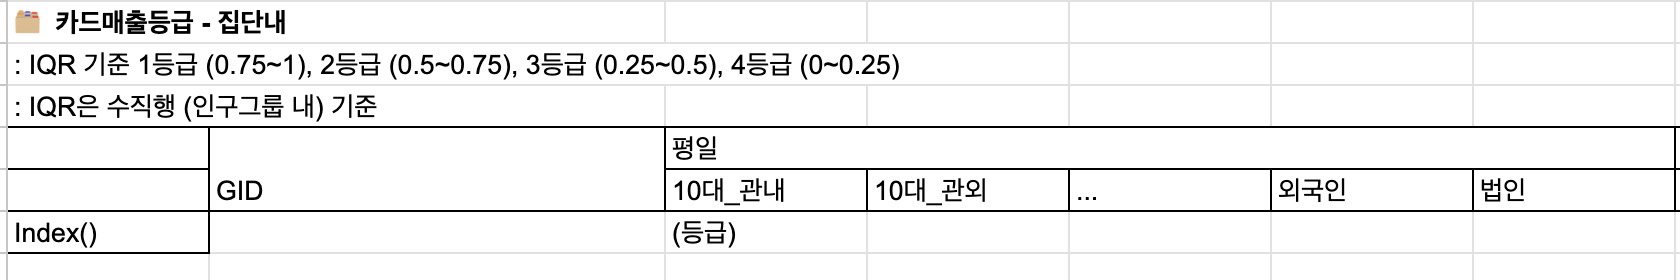

In [219]:
import pandas as pd

df = pd.read_pickle('dataset/CD_SALES_processed.pkl')
df.head()

,GID,A10_관내_T,A10_관외_T,A20_관내_T,A20_관외_T,A30_관내_T,A30_관외_T,A40_관내_T,A40_관외_T,A50_관내_T,A50_관외_T,A60_관내_T,A60_관외_T,외국인_A10,외국인_A20,외국인_A30,외국인_A40,외국인_A50,외국인_A60,법인_A10,법인_A20,법인_A30,법인_A40,법인_A50,법인_A60,A10_관내_WD,A10_관외_WD,A20_관내_WD,A20_관외_WD,A30_관내_WD,A30_관외_WD,A40_관내_WD,A40_관외_WD,A50_관내_WD,A50_관외_WD,A60_관내_WD,A60_관외_WD,A10_관내_HD,A10_관외_HD,A20_관내_HD,A20_관외_HD,A30_관내_HD,A30_관외_HD,A40_관내_HD,A40_관외_HD,A50_관내_HD,A50_관외_HD,A60_관내_HD,A60_관외_HD
202301,다사633494,75.6125,146.0104,15.6752,19.6445,105.3431,32.4111,18.2912,115.7526,101.7623,133.1323,90.2775,105.1160,54.5365,91.8547,34.9244,51.7703,139.8649,17.9982,9.2179,35.3266,108.9586,72.5817,65.7368,43.4129,145.1701,116.1390,122.2308,96.5837,81.8587,104.8030,83.6861,36.3705,136.9450,44.7678,68.5151,45.9913,119.0858,72.1303,20.4325,8.6235,77.9265,130.7499,47.4623,76.1154,128.1334,11.6603,32.8228,140.4262
202301,다사626517,21.0800,72.2740,43.5208,115.8191,49.7160,12.4467,57.9968,138.7443,31.7960,73.2505,79.0143,27.0206,130.8211,89.3765,29.5991,111.7475,103.3642,72.6174,124.0634,117.7726,118.5107,93.7465,23.8199,112.1126,104.7284,79.3248,135.8534,69.3663,11.9809,74.4525,53.0327,102.3833,139.4728,37.1702,125.5650,9.6280,23.9982,137.0964,99.8758,34.9298,86.5824,135.7707,61.7702,50.2302,39.9600,71.3202,90.8793,142.4943
202301,다사640506,141.0926,45.4665,107.9257,69.6231,10.6333,6.1330,64.2508,16.4860,65.1608,62.0425,9.3686,41.7231,9.4120,78.8579,97.6569,7.6401,67.9838,104.8085,44.4329,87.7752,115.3288,50.1682,146.8139,109.6185,129.8044,10.6790,85.3937,139.9728,87.5212,113.7899,87.2134,76.4160,137.9226,34.8818,69.4684,71.7396,87.0467,31.7327,62.9311,145.6005,62.8927,24.6485,116.6552,104.0058,137.1724,128.0126,72.8106,89.9786
202301,다사642512,129.5895,134.8308,123.9903,20.9714,7.1159,91.3145,133.4876,52.6393,113.1306,132.1555,42.8682,76.0205,102.1433,55.6610,71.0426,81.5448,39.1709,27.9949,141.6604,105.0728,118.9634,58.2706,69.3983,9.7358,64.1565,12.5120,96.6252,76.9967,124.2472,103.7831,107.7615,141.1136,97.6902,90.8541,142.2244,97.3596,100.3080,74.1852,25.8231,1.2180,6.9411,68.3269,34.0542,129.9505,84.7679,138.4921,17.6695,23.3823
202301,다사647489,140.1573,75.0866,73.1269,40.4861,121.5045,81.4780,128.4484,1.7980,133.3632,145.6752,68.8305,32.3530,41.9812,68.1531,91.8723,109.4083,30.6501,101.0410,89.2661,144.2249,149.6983,63.4672,13.1491,55.2975,101.5154,55.4836,98.2382,57.9437,60.4168,73.8767,85.2529,78.0254,52.7421,138.7516,131.8313,109.0450,106.7243,109.4929,26.0647,131.3447,80.6124,80.4723,147.0279,102.0315,76.6902,117.7689,140.7101,128.4141


In [223]:
#test code
df_jan = df[df.index=='202301']
columns = df_jan.columns.to_list()
df_jan[columns[1]]

202301     75.6125
202301     21.0800
202301    141.0926
202301    129.5895
202301    140.1573
            ...   
202301     56.0388
202301    147.9622
202301     31.1368
202301    135.1509
202301      3.4046
Name: A10_관내_T, Length: 1812, dtype: float64

In [227]:
min = df_jan[columns[1]].min()
q1 = df_jan[columns[1]].quantile(0.25)
q2 = df_jan[columns[1]].quantile(0.5)
q3 = df_jan[columns[1]].quantile(0.75)
max = df_jan[columns[1]].max()
bins = [min, q1, q2, q3, max]
labels = ['1', '2', '3', '4']
pd.cut(df_jan[columns[1]], bins=bins, labels=labels)

202301    2
202301    1
202301    4
202301    4
202301    4
         ..
202301    2
202301    4
202301    1
202301    4
202301    1
Name: A10_관내_T, Length: 1812, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

In [231]:
for i in range(1,len(columns)):
    min = df_jan[columns[i]].min()
    q1 = df_jan[columns[i]].quantile(0.25)
    q2 = df_jan[columns[i]].quantile(0.5)
    q3 = df_jan[columns[i]].quantile(0.75)
    max = df_jan[columns[i]].max()
    bins = [min, q1, q2, q3, max]
    labels = ['1', '2', '3', '4']
    df_jan[columns[i]] = pd.cut(df_jan[columns[i]], bins=bins, labels=labels)

/var/folders/ym/c6nn5rhx7sz6q6mw_m3tykqw0000gn/T/ipykernel_1493/3667919704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan[columns[i]] = pd.cut(df_jan[columns[i]], bins=bins, labels=labels)
/var/folders/ym/c6nn5rhx7sz6q6mw_m3tykqw0000gn/T/ipykernel_1493/3667919704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan[columns[i]] = pd.cut(df_jan[columns[i]], bins=bins, labels=labels)
/var/folders/ym/c6nn5rhx7sz6q6mw_m3tykqw0000gn/T/ipykernel_1493/3667919704.py:9: SettingWithCopyWarning: 
A va

IndexError: list index out of range

In [243]:
import warnings
warnings.filterwarnings('ignore')

date_list = ['202301', '202302', '202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312']
columns_list = columns = df.columns.to_list()
ver_grade_df = pd.DataFrame(columns=columns_list)

for date in date_list:
    temp = df[df.index==date]

    for i in range(1,len(columns_list)):
        min = temp[columns_list[i]].min()
        q1 = temp[columns_list[i]].quantile(0.25)
        q2 = temp[columns_list[i]].quantile(0.5)
        q3 = temp[columns_list[i]].quantile(0.75)
        max = temp[columns_list[i]].max()
        bins = [min, q1, q2, q3, max]
        labels = ['1', '2', '3', '4']
        
        temp[columns_list[i]] = pd.cut(temp[columns_list[i]], bins=bins, labels=labels)

    ver_grade_df = pd.concat([ver_grade_df, temp])

In [244]:
ver_grade_df

,GID,A10_관내_T,A10_관외_T,A20_관내_T,A20_관외_T,A30_관내_T,A30_관외_T,A40_관내_T,A40_관외_T,A50_관내_T,A50_관외_T,A60_관내_T,A60_관외_T,외국인_A10,외국인_A20,외국인_A30,외국인_A40,외국인_A50,외국인_A60,법인_A10,법인_A20,법인_A30,법인_A40,법인_A50,법인_A60,A10_관내_WD,A10_관외_WD,A20_관내_WD,A20_관외_WD,A30_관내_WD,A30_관외_WD,A40_관내_WD,A40_관외_WD,A50_관내_WD,A50_관외_WD,A60_관내_WD,A60_관외_WD,A10_관내_HD,A10_관외_HD,A20_관내_HD,A20_관외_HD,A30_관내_HD,A30_관외_HD,A40_관내_HD,A40_관외_HD,A50_관내_HD,A50_관외_HD,A60_관내_HD,A60_관외_HD
202301,다사633494,2,4,1,1,3,1,1,4,3,4,3,3,2,3,2,2,4,1,1,1,3,2,2,2,4,4,4,3,3,3,3,2,4,2,2,2,4,2,1,1,3,4,2,3,4,1,1,4
202301,다사626517,1,2,2,4,2,1,2,4,1,2,3,1,4,3,1,3,3,2,4,4,4,3,1,4,3,3,4,2,1,3,2,3,4,1,4,1,1,4,3,1,3,4,2,2,2,2,3,4
202301,다사640506,4,2,3,2,1,1,2,1,2,2,1,2,1,3,3,1,2,3,2,3,4,2,4,3,4,1,3,4,3,4,3,3,4,1,2,2,3,1,2,4,2,1,4,3,4,4,2,3
202301,다사642512,4,4,4,1,1,3,4,2,4,4,2,2,3,2,2,3,2,1,4,3,4,2,2,1,2,1,3,3,4,3,3,4,3,3,4,3,3,3,1,1,1,2,1,4,3,4,1,1
202301,다사647489,4,2,2,2,4,3,4,1,4,4,2,1,2,2,3,3,1,3,3,4,4,2,1,2,3,2,3,2,2,2,3,3,2,4,4,3,3,3,1,4,3,3,4,3,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202312,다사636487,4,2,3,4,4,3,3,4,1,4,1,4,3,3,1,4,4,2,1,2,4,4,1,4,4,2,3,4,3,3,4,4,3,4,4,3,3,4,4,2,4,4,1,3,4,3,2,2
202312,다사644526,2,1,2,2,4,3,1,2,1,1,1,1,3,3,4,1,2,4,3,2,2,2,2,2,3,3,3,2,3,3,2,2,1,2,4,1,2,1,1,1,2,2,2,4,4,2,3,1
202312,다사624501,1,3,2,3,4,2,1,1,3,1,4,1,2,3,4,4,3,2,1,1,3,2,3,1,4,3,4,4,2,3,1,4,4,3,1,2,1,3,2,3,4,3,1,4,4,1,2,3
202312,다사613479,4,4,4,2,1,2,2,1,3,1,2,3,2,3,1,2,4,1,2,4,2,2,2,4,1,2,1,2,3,2,1,4,2,1,4,1,1,1,1,4,1,3,3,4,1,2,2,3


In [248]:
# 데이터프레임 저장 
ver_grade_df.to_csv('dataset/CD_SALES_GRADE_vertical.csv')

## 2) 집단 간 등급 (동일 gid내)
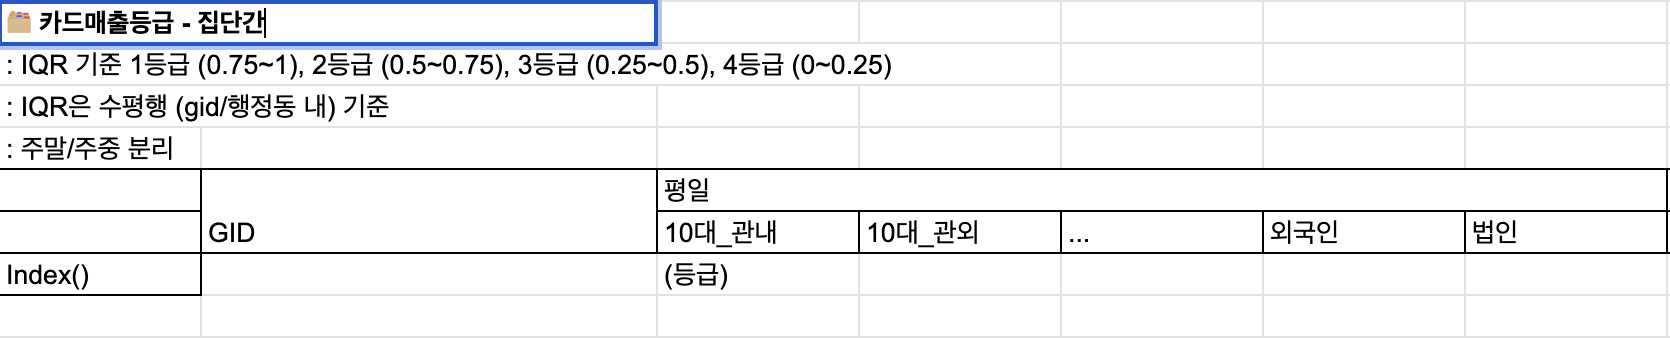

In [245]:
import pandas as pd

df = pd.read_pickle('dataset/CD_SALES_processed.pkl')

In [246]:
import warnings
warnings.filterwarnings('ignore')

date_list = ['202301', '202302', '202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312']
columns_list = columns = df.columns.to_list()
hor_grade_df = pd.DataFrame(columns=columns_list)

for date in date_list:
    temp = df[df.index==date]

    for i in range(1,len(columns_list)):
        min = temp[columns_list[i]].min()
        q1 = temp[columns_list[i]].quantile(0.25)
        q2 = temp[columns_list[i]].quantile(0.5)
        q3 = temp[columns_list[i]].quantile(0.75)
        max = temp[columns_list[i]].max()
        bins = [min, q1, q2, q3, max]
        labels = ['1', '2', '3', '4']
        
        temp[columns_list[i]] = pd.cut(temp[columns_list[i]], bins=bins, labels=labels)

    hor_grade_df = pd.concat([hor_grade_df, temp])

In [247]:
hor_grade_df

,GID,A10_관내_T,A10_관외_T,A20_관내_T,A20_관외_T,A30_관내_T,A30_관외_T,A40_관내_T,A40_관외_T,A50_관내_T,A50_관외_T,A60_관내_T,A60_관외_T,외국인_A10,외국인_A20,외국인_A30,외국인_A40,외국인_A50,외국인_A60,법인_A10,법인_A20,법인_A30,법인_A40,법인_A50,법인_A60,A10_관내_WD,A10_관외_WD,A20_관내_WD,A20_관외_WD,A30_관내_WD,A30_관외_WD,A40_관내_WD,A40_관외_WD,A50_관내_WD,A50_관외_WD,A60_관내_WD,A60_관외_WD,A10_관내_HD,A10_관외_HD,A20_관내_HD,A20_관외_HD,A30_관내_HD,A30_관외_HD,A40_관내_HD,A40_관외_HD,A50_관내_HD,A50_관외_HD,A60_관내_HD,A60_관외_HD
202301,다사633494,2,4,1,1,3,1,1,4,3,4,3,3,2,3,2,2,4,1,1,1,3,2,2,2,4,4,4,3,3,3,3,2,4,2,2,2,4,2,1,1,3,4,2,3,4,1,1,4
202301,다사626517,1,2,2,4,2,1,2,4,1,2,3,1,4,3,1,3,3,2,4,4,4,3,1,4,3,3,4,2,1,3,2,3,4,1,4,1,1,4,3,1,3,4,2,2,2,2,3,4
202301,다사640506,4,2,3,2,1,1,2,1,2,2,1,2,1,3,3,1,2,3,2,3,4,2,4,3,4,1,3,4,3,4,3,3,4,1,2,2,3,1,2,4,2,1,4,3,4,4,2,3
202301,다사642512,4,4,4,1,1,3,4,2,4,4,2,2,3,2,2,3,2,1,4,3,4,2,2,1,2,1,3,3,4,3,3,4,3,3,4,3,3,3,1,1,1,2,1,4,3,4,1,1
202301,다사647489,4,2,2,2,4,3,4,1,4,4,2,1,2,2,3,3,1,3,3,4,4,2,1,2,3,2,3,2,2,2,3,3,2,4,4,3,3,3,1,4,3,3,4,3,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202312,다사636487,4,2,3,4,4,3,3,4,1,4,1,4,3,3,1,4,4,2,1,2,4,4,1,4,4,2,3,4,3,3,4,4,3,4,4,3,3,4,4,2,4,4,1,3,4,3,2,2
202312,다사644526,2,1,2,2,4,3,1,2,1,1,1,1,3,3,4,1,2,4,3,2,2,2,2,2,3,3,3,2,3,3,2,2,1,2,4,1,2,1,1,1,2,2,2,4,4,2,3,1
202312,다사624501,1,3,2,3,4,2,1,1,3,1,4,1,2,3,4,4,3,2,1,1,3,2,3,1,4,3,4,4,2,3,1,4,4,3,1,2,1,3,2,3,4,3,1,4,4,1,2,3
202312,다사613479,4,4,4,2,1,2,2,1,3,1,2,3,2,3,1,2,4,1,2,4,2,2,2,4,1,2,1,2,3,2,1,4,2,1,4,1,1,1,1,4,1,3,3,4,1,2,2,3


In [249]:
# 데이터프레임 저장 
hor_grade_df.to_csv('dataset/CD_SALES_GRADE_horizontal.csv')